# **PUSTAKA**

In [1]:
import pandas as pd
import numpy as np

# **LOAD DATA**

In [2]:
app_train = pd.read_csv('home-credit-default-risk/application_train.csv')
bureau = pd.read_csv('home-credit-default-risk/bureau.csv')
bureau_balance = pd.read_csv('home-credit-default-risk/bureau_balance.csv')

print(f"App_train: {app_train.shape}")
print(f"Bureau: {bureau.shape}")
print(f"Bureau_balance: {bureau_balance.shape}")

App_train: (307511, 122)
Bureau: (1716428, 17)
Bureau_balance: (27299925, 3)


# **EDA FEATURE ENGINEERING**

In [3]:
pos_cash = pd.read_csv('home-credit-default-risk/POS_CASH_balance.csv')
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [4]:
pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [5]:
pos_cash.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,10001358,1.000136e+07,1.000136e+07
unique,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,9151119,NaN,NaN
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,NaN,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,NaN,0.000000e+00,0.000000e+00


In [6]:
cc_balance = pd.read_csv('home-credit-default-risk/credit_card_balance.csv')
cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [7]:
cc_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [8]:
cc_balance.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3840312,3.840312e+06,3.840312e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3698436,NaN,NaN
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,NaN,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,NaN,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,NaN,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,NaN,0.000000e+00,0.000000e+00


In [9]:
installments = pd.read_csv('home-credit-default-risk/installments_payments.csv')
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [10]:
installments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [11]:
installments.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [12]:
pos_cash_dummies = pd.get_dummies(pos_cash['NAME_CONTRACT_STATUS'], prefix='POS_STATUS')
pos_cash_processed = pd.concat([pos_cash.drop(columns=['NAME_CONTRACT_STATUS']), pos_cash_dummies], axis=1)

In [13]:
num_aggregations = {
    'MONTHS_BALANCE': ['min', 'max', 'mean', 'count'],
    'CNT_INSTALMENT_FUTURE': ['min', 'max', 'mean', 'sum'],
    # Fitur Emas: Keterlambatan pembayaran
    'SK_DPD': ['max', 'mean', 'sum'],
    'SK_DPD_DEF': ['max', 'mean', 'sum'],
}

cat_aggregations = {col: ['mean'] for col in pos_cash_dummies.columns}

In [14]:
pos_cash_agg = pos_cash_processed.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})

new_cols = []
for col_val, stat in pos_cash_agg.columns:
    new_cols.append(f'POS_{col_val}_{stat.upper()}')

pos_cash_agg.columns = new_cols

pos_cash_agg['POS_ENTRY_COUNT'] = pos_cash_processed.groupby('SK_ID_CURR').size()

pos_cash_agg.head()

,POS_MONTHS_BALANCE_MIN,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_COUNT,POS_CNT_INSTALMENT_FUTURE_MIN,POS_CNT_INSTALMENT_FUTURE_MAX,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_CNT_INSTALMENT_FUTURE_SUM,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,...,POS_POS_STATUS_Active_MEAN,POS_POS_STATUS_Amortized debt_MEAN,POS_POS_STATUS_Approved_MEAN,POS_POS_STATUS_Canceled_MEAN,POS_POS_STATUS_Completed_MEAN,POS_POS_STATUS_Demand_MEAN,POS_POS_STATUS_Returned to the store_MEAN,POS_POS_STATUS_Signed_MEAN,POS_POS_STATUS_XNA_MEAN,POS_ENTRY_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-96,-53,-72.555556,9,0.0,4.0,1.444444,13.0,7,0.777778,...,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0,9
100002,-19,-1,-10.000000,19,6.0,24.0,15.000000,285.0,0,0.000000,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,19
100003,-77,-18,-43.785714,28,0.0,12.0,5.785714,162.0,0,0.000000,...,0.928571,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,28
100004,-27,-24,-25.500000,4,0.0,4.0,2.250000,9.0,0,0.000000,...,0.750000,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0,4
100005,-25,-15,-20.000000,11,0.0,12.0,7.200000,72.0,0,0.000000,...,0.818182,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0,11


In [15]:
null_float_cols = [
    'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
    'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
    'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
    'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM'
]

cc_balance[null_float_cols] = cc_balance[null_float_cols].fillna(0)


In [16]:
cc_balance['CC_UTILIZATION_RATIO'] = np.where(
    cc_balance['AMT_CREDIT_LIMIT_ACTUAL'] == 0, 
    0, 
    cc_balance['AMT_BALANCE'] / cc_balance['AMT_CREDIT_LIMIT_ACTUAL']
)

In [17]:
cc_dummies = pd.get_dummies(cc_balance['NAME_CONTRACT_STATUS'], prefix='CC_STATUS')
cc_processed = pd.concat([cc_balance.drop(columns=['NAME_CONTRACT_STATUS']), cc_dummies], axis=1)

In [18]:
num_aggregations = {
    'MONTHS_BALANCE': ['min', 'max', 'mean', 'count'],
    'AMT_BALANCE': ['max', 'mean', 'sum'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['mean', 'max'],
    'AMT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['max', 'mean', 'sum'],
    
    # Fitur Baru
    'CC_UTILIZATION_RATIO': ['mean', 'max', 'min'],
    
    # Fitur Emas
    'SK_DPD': ['max', 'mean', 'sum'],
    'SK_DPD_DEF': ['max', 'mean', 'sum'],
}

cat_aggregations = {col: ['mean'] for col in cc_dummies.columns}

In [19]:
cc_balance_agg = cc_processed.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})

new_cols = []
for col_val, stat in cc_balance_agg.columns:
    new_cols.append(f'CC_{col_val}_{stat.upper()}')

cc_balance_agg.columns = new_cols

cc_balance_agg['CC_ENTRY_COUNT'] = cc_processed.groupby('SK_ID_CURR').size()

cc_balance_agg.head()

,CC_MONTHS_BALANCE_MIN,CC_MONTHS_BALANCE_MAX,CC_MONTHS_BALANCE_MEAN,CC_MONTHS_BALANCE_COUNT,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_SUM,CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_AMT_CREDIT_LIMIT_ACTUAL_MAX,CC_AMT_DRAWINGS_CURRENT_MAX,...,CC_SK_DPD_DEF_MEAN,CC_SK_DPD_DEF_SUM,CC_CC_STATUS_Active_MEAN,CC_CC_STATUS_Approved_MEAN,CC_CC_STATUS_Completed_MEAN,CC_CC_STATUS_Demand_MEAN,CC_CC_STATUS_Refused_MEAN,CC_CC_STATUS_Sent proposal_MEAN,CC_CC_STATUS_Signed_MEAN,CC_ENTRY_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,-6,-1,-3.5,6,0.00,0.000000,0.000,270000.000000,270000,0.0,...,0.000000,0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,6
100011,-75,-2,-38.5,74,189000.00,54482.111149,4031676.225,164189.189189,180000,180000.0,...,0.000000,0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,74
100013,-96,-1,-48.5,96,161420.22,18159.919219,1743352.245,131718.750000,157500,157500.0,...,0.010417,1,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,96
100021,-18,-2,-10.0,17,0.00,0.000000,0.000,675000.000000,675000,0.0,...,0.000000,0,0.411765,0.0,0.588235,0.0,0.0,0.0,0.0,17
100023,-11,-4,-7.5,8,0.00,0.000000,0.000,135000.000000,225000,0.0,...,0.000000,0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,8


In [20]:
# 1. Fitur Keterlambatan Bayar
installments['DAYS_PAST_DUE'] = installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT']

# 2. Fitur Kekurangan Bayar
installments['PAYMENT_DIFF'] = installments['AMT_INSTALMENT'] - installments['AMT_PAYMENT']

# 3. Flag Biner (1 jika telat/kurang, 0 jika tidak)
# Kita isi NaN (pembayaran yang belum terjadi) dengan 0
installments['PAYMENT_LATE'] = installments['DAYS_PAST_DUE'].apply(lambda x: 1 if x > 0 else 0)
installments['PAYMENT_UNDERPAID'] = installments['PAYMENT_DIFF'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
num_aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'NUM_INSTALMENT_NUMBER': ['max', 'mean', 'sum'],
    
    # Fitur Emas: Keterlambatan
    'DAYS_PAST_DUE': ['max', 'mean', 'sum', 'min'],
    'PAYMENT_LATE': ['mean', 'sum'], # Rata-rata keterlambatan
    
    # Fitur Emas: Kekurangan Bayar
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'min'],
    'PAYMENT_UNDERPAID': ['mean', 'sum'], # Rata-rata kekurangan bayar
    
    'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
}

In [22]:
installments_agg = installments.groupby('SK_ID_CURR').agg(num_aggregations)

new_cols = []
for col_val, stat in installments_agg.columns:
    new_cols.append(f'INS_{col_val}_{stat.upper()}')

installments_agg.columns = new_cols

installments_agg['INS_ENTRY_COUNT'] = installments.groupby('SK_ID_CURR').size()

installments_agg.head()

,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MAX,INS_NUM_INSTALMENT_NUMBER_MEAN,INS_NUM_INSTALMENT_NUMBER_SUM,INS_DAYS_PAST_DUE_MAX,INS_DAYS_PAST_DUE_MEAN,INS_DAYS_PAST_DUE_SUM,INS_DAYS_PAST_DUE_MIN,INS_PAYMENT_LATE_MEAN,INS_PAYMENT_LATE_SUM,...,INS_PAYMENT_UNDERPAID_MEAN,INS_PAYMENT_UNDERPAID_SUM,INS_AMT_INSTALMENT_MAX,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_SUM,INS_AMT_PAYMENT_MIN,INS_AMT_PAYMENT_MAX,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_ENTRY_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,2,4,2.714286,19,11.0,-7.285714,-51.0,-36.0,0.142857,1,...,0.0,0,17397.900,5885.132143,41195.925,3951.000,17397.900,5885.132143,41195.925,7
100002,2,19,10.000000,190,-12.0,-20.421053,-388.0,-31.0,0.000000,0,...,0.0,0,53093.745,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,19
100003,2,12,5.080000,127,-1.0,-7.160000,-179.0,-14.0,0.000000,0,...,0.0,0,560835.360,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,25
100004,2,3,2.000000,6,-3.0,-7.666667,-23.0,-11.0,0.000000,0,...,0.0,0,10573.965,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,3
100005,2,9,5.000000,45,1.0,-23.555556,-212.0,-37.0,0.111111,1,...,0.0,0,17656.245,6240.205000,56161.845,4813.200,17656.245,6240.205000,56161.845,9


In [23]:
bureau = pd.read_csv('home-credit-default-risk/bureau.csv')
bureau_balance = pd.read_csv('home-credit-default-risk/bureau_balance.csv')

print(f"Bureau: {bureau.shape}")
print(f"Bureau_balance: {bureau_balance.shape}")

Bureau: (1716428, 17)
Bureau_balance: (27299925, 3)


In [24]:
bb_status_dummies = pd.get_dummies(bureau_balance['STATUS'], prefix='BB_STATUS')
bb_processed = pd.concat([bureau_balance[['SK_ID_BUREAU', 'MONTHS_BALANCE']], bb_status_dummies], axis=1)

bb_aggregations = {
    'MONTHS_BALANCE': ['min', 'max', 'count'],
    **{col: ['mean'] for col in bb_status_dummies.columns} # Proporsi tiap status
}

bb_agg = bb_processed.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([f'{col[0]}_{col[1].upper()}' for col in bb_agg.columns])

bb_agg.head()

,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_COUNT,BB_STATUS_0_MEAN,BB_STATUS_1_MEAN,BB_STATUS_2_MEAN,BB_STATUS_3_MEAN,BB_STATUS_4_MEAN,BB_STATUS_5_MEAN,BB_STATUS_C_MEAN,BB_STATUS_X_MEAN
SK_ID_BUREAU,,,,,,,,,,,
5001709,-96,0,97,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402
5001710,-82,0,83,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446
5001711,-3,0,4,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000
5001712,-18,0,19,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000
5001713,-21,0,22,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000


In [25]:
bureau = pd.merge(bureau, bb_agg, on='SK_ID_BUREAU', how='left')

In [26]:
bureau_cat_features = [col for col in bureau.columns if bureau[col].dtype == 'object']
bureau_dummies = pd.get_dummies(bureau[bureau_cat_features], prefix_sep='_', prefix=bureau_cat_features)
bureau_processed = pd.concat([bureau.drop(columns = bureau_cat_features), bureau_dummies], axis=1)

num_aggregations_bureau = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'count'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    
    # Fitur dari bb_agg
    'MONTHS_BALANCE_COUNT': ['mean', 'sum', 'min', 'max'],
    'BB_STATUS_C_MEAN': ['mean', 'sum'], # Proporsi lunas
    'BB_STATUS_0_MEAN': ['mean', 'sum'], # Proporsi on-time
}
cat_aggregations_bureau = {col: ['mean'] for col in bureau_dummies.columns}

bureau_agg = bureau_processed.groupby('SK_ID_CURR').agg({**num_aggregations_bureau, **cat_aggregations_bureau})

new_cols = []
for col_val, stat in bureau_agg.columns:
    new_cols.append(f'BUREAU_{col_val}_{stat.upper()}')
bureau_agg.columns = new_cols

bureau_agg.head()

,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_COUNT,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,...,BUREAU_CREDIT_TYPE_Interbank credit_MEAN,BUREAU_CREDIT_TYPE_Loan for business development_MEAN,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_MEAN,BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_MEAN,BUREAU_CREDIT_TYPE_Loan for working capital replenishment_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mobile operator loan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Real estate loan_MEAN,BUREAU_CREDIT_TYPE_Unknown type of loan_MEAN
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,7,0,0.0,0,378000.0,207623.571429,1453365.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,-1437,-103,-874.000000,8,0,0.0,0,450000.0,108131.945625,865055.565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,-2586,-606,-1400.750000,4,0,0.0,0,810000.0,254350.125000,1017400.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,-1326,-408,-867.000000,2,0,0.0,0,94537.8,94518.900000,189037.800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,-373,-62,-190.666667,3,0,0.0,0,568800.0,219042.000000,657126.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import numpy as np
prev_app = pd.read_csv('home-credit-default-risk/previous_application.csv')

cols_with_sentinel = [
    'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE', 'DAYS_TERMINATION'
]
prev_app[cols_with_sentinel] = prev_app[cols_with_sentinel].replace(365243, np.nan)

prev_app = prev_app.drop(columns=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'])


In [28]:
prev_cat_features = [col for col in prev_app.columns if prev_app[col].dtype == 'object']
prev_app_dummies = pd.get_dummies(prev_app[prev_cat_features], prefix_sep='_', prefix=prev_cat_features)
prev_app_processed = pd.concat([prev_app.drop(columns=prev_cat_features), prev_app_dummies], axis=1)

# Definisikan Agregasi
num_aggregations_prev = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'], # Kapan keputusan dibuat
    'CNT_PAYMENT': ['mean', 'sum'],
}
cat_aggregations_prev = {
    # Proporsi status kontrak sebelumnya
    'PREV_NAME_CONTRACT_STATUS_Approved_MEAN': ['mean', 'sum'],
    'PREV_NAME_CONTRACT_STATUS_Refused_MEAN': ['mean', 'sum'],
    'PREV_NAME_CONTRACT_STATUS_Canceled_MEAN': ['mean', 'sum'],
    # Proporsi alasan penolakan
    'PREV_CODE_REJECT_REASON_HC_MEAN': ['mean', 'sum'],
    'PREV_CODE_REJECT_REASON_LIMIT_MEAN': ['mean', 'sum'],
    'PREV_CODE_REJECT_REASON_SCO_MEAN': ['mean', 'sum'],
}

relevant_cat_cols = [col for col in cat_aggregations_prev.keys() if col in prev_app_processed.columns]
cat_aggregations_prev_final = {col: agg for col, agg in cat_aggregations_prev.items() if col in relevant_cat_cols}


prev_app_agg = prev_app_processed.groupby('SK_ID_CURR').agg({**num_aggregations_prev, **cat_aggregations_prev_final})

new_cols_prev = []
for col_val, stat in prev_app_agg.columns:
    new_cols_prev.append(f'PREV_{col_val}_{stat.upper()}')
prev_app_agg.columns = new_cols_prev

prev_app_agg['PREV_APP_COUNT'] = prev_app_processed.groupby('SK_ID_CURR')['SK_ID_PREV'].count()

prev_app_agg.head()

,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_AMT_GOODS_PRICE_MIN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_APP_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,23787.0,23787.0,23787.00,24835.5,24835.5,24835.5,-1740,-1740,-1740.0,8.0,8.0,1
100002,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,179055.0,179055.0,179055.0,-606,-606,-606.0,24.0,24.0,1
100003,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,68809.5,900000.0,435436.5,-2341,-746,-1305.0,10.0,30.0,3
100004,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,24282.0,24282.0,24282.0,-815,-815,-815.0,4.0,4.0,1
100005,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,0.0,40153.5,20076.75,44617.5,44617.5,44617.5,-757,-315,-536.0,12.0,12.0,2


In [29]:
app_train = pd.read_csv('home-credit-default-risk/application_train.csv')
print(f"Bentuk app_train (awal): {app_train.shape}")

Bentuk app_train (awal): (307511, 122)


In [30]:
df = pd.merge(app_train, bureau_agg, on='SK_ID_CURR', how='left')
print(f"Bentuk setelah +bureau: {df.shape}")

df = pd.merge(df, prev_app_agg, on='SK_ID_CURR', how='left')
print(f"Bentuk setelah +prev_app: {df.shape}")

df = pd.merge(df, pos_cash_agg, on='SK_ID_CURR', how='left')
print(f"Bentuk setelah +pos_cash: {df.shape}")

df = pd.merge(df, cc_balance_agg, on='SK_ID_CURR', how='left')
print(f"Bentuk setelah +cc_balance: {df.shape}")

df = pd.merge(df, installments_agg, on='SK_ID_CURR', how='left')
print(f"Bentuk setelah +installments (FINAL): {df.shape}")

Bentuk setelah +bureau: (307511, 166)
Bentuk setelah +prev_app: (307511, 184)
Bentuk setelah +pos_cash: (307511, 208)
Bentuk setelah +cc_balance: (307511, 240)
Bentuk setelah +installments (FINAL): (307511, 264)


In [31]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,INS_PAYMENT_UNDERPAID_MEAN,INS_PAYMENT_UNDERPAID_SUM,INS_AMT_INSTALMENT_MAX,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_SUM,INS_AMT_PAYMENT_MIN,INS_AMT_PAYMENT_MAX,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_ENTRY_COUNT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.000000,0.0,53093.745,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,19.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,0.0,560835.360,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,25.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,0.0,10573.965,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,3.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.000000,0.0,691786.890,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,16.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.090909,6.0,22678.785,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,66.0


# **EDA DATA GABUNGAN**

In [32]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 264 columns):
 #    Column                                                                Non-Null Count   Dtype  
---   ------                                                                --------------   -----  
 0    SK_ID_CURR                                                            307511 non-null  int64  
 1    TARGET                                                                307511 non-null  int64  
 2    NAME_CONTRACT_TYPE                                                    307511 non-null  object 
 3    CODE_GENDER                                                           307511 non-null  object 
 4    FLAG_OWN_CAR                                                          307511 non-null  object 
 5    FLAG_OWN_REALTY                                                       307511 non-null  object 
 6    CNT_CHILDREN                                                          3075

In [33]:
def check_missing_values(dataframe):
    missing_counts = dataframe.isnull().sum()
    
    total_data = dataframe.shape[0]
    
    missing_percentage = (missing_counts / total_data) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percentage
    })
    
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(
        by='Missing Percentage', ascending=False
    )
    
    return missing_df

missing_values = check_missing_values(df)

print(f"Total kolom: {df.shape[1]}")
print(f"Kolom yang memiliki missing values: {len(missing_values)}")

missing_values.head(50)

Total kolom: 264
Kolom yang memiliki missing values: 209


,Missing Count,Missing Percentage
CC_AMT_CREDIT_LIMIT_ACTUAL_MAX,220606,71.739222
CC_CC_UTILIZATION_RATIO_MAX,220606,71.739222
CC_CC_UTILIZATION_RATIO_MIN,220606,71.739222
CC_SK_DPD_MAX,220606,71.739222
CC_SK_DPD_MEAN,220606,71.739222
CC_SK_DPD_SUM,220606,71.739222
CC_SK_DPD_DEF_MAX,220606,71.739222
CC_SK_DPD_DEF_MEAN,220606,71.739222
CC_SK_DPD_DEF_SUM,220606,71.739222
CC_ENTRY_COUNT,220606,71.739222


In [34]:
MISSING_THRESHOLD = 60

cols_to_drop = missing_values[missing_values['Missing Percentage'] > MISSING_THRESHOLD].index

df = df.drop(columns=cols_to_drop)

print(f"\nJumlah kolom awal: 418")
print(f"Jumlah kolom tersisa: {df.shape[1]}")


Jumlah kolom awal: 418
Jumlah kolom tersisa: 210


In [35]:
print(f"Bentuk 'df' sebelum OHE: {df.shape}")

categorical_cols = df.select_dtypes('object').columns

print(f"Ditemukan {len(categorical_cols)} kolom kategorikal: {categorical_cols.tolist()}")

df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False) # dummy_na=False -> jangan buat kolom untuk NaN

print(f"Bentuk 'df' setelah OHE: {df.shape}")

Bentuk 'df' sebelum OHE: (307511, 210)
Ditemukan 15 kolom kategorikal: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Bentuk 'df' setelah OHE: (307511, 331)


In [36]:
print("Mengisi sisa missing values (NaN) dengan 0...")

df = df.fillna(0)

total_missing_after = df.isnull().sum().sum()
print(f"Total missing values tersisa: {total_missing_after}")

Mengisi sisa missing values (NaN) dengan 0...
Total missing values tersisa: 0


In [37]:
print("Data cleaning selesai.")
print(f"Bentuk data final dan siap untuk model: {df.shape}")
df.head()

Data cleaning selesai.
Bentuk data final dan siap untuk model: (307511, 331)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,True,False,True,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,True,False,False,False,False,False,False,True,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


# **MODELING**

--- Menganalisis Distribusi Target (y) ---

Persentase Kelas Target:
Lunas (0):       91.93%
Gagal Bayar (1): 8.07%

Visualisasi Distribusi Target:


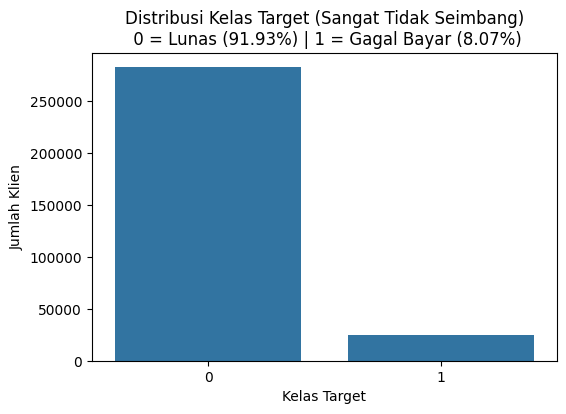

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Menganalisis Distribusi Target (y) ---")

y = df['TARGET']

target_percentage = y.value_counts(normalize=True) * 100

print("\nPersentase Kelas Target:")
print(f"Lunas (0):       {target_percentage[0]:.2f}%")
print(f"Gagal Bayar (1): {target_percentage[1]:.2f}%")

print("\nVisualisasi Distribusi Target:")
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title(f'Distribusi Kelas Target (Sangat Tidak Seimbang)\n 0 = Lunas ({target_percentage[0]:.2f}%) | 1 = Gagal Bayar ({target_percentage[1]:.2f}%)')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Klien')
plt.show()

In [39]:

y = df['TARGET']
X = df.drop(columns=['TARGET', 'SK_ID_CURR'])

print(f"Bentuk Fitur (X): {X.shape}")
print(f"Bentuk Target (y): {y.shape}")

Bentuk Fitur (X): (307511, 329)
Bentuk Target (y): (307511,)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y      # Tetap gunakan stratify
)

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_val: {X_val.shape}")

Bentuk X_train: (246008, 329)
Bentuk X_val: (61503, 329)


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)


In [42]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=42)

print("Menerapkan SMOTE pada data training...")
# Kita 'fit_resample' HANYA pada data training yang sudah di-scale
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("SMOTE selesai.")
print(f"Bentuk X_train sebelum SMOTE: {X_train_scaled.shape}")
print(f"Bentuk X_train setelah SMOTE: {X_train_smote.shape}")

# Mari kita lihat distribusi y_train yang baru
print("\nDistribusi Target (y_train) setelah SMOTE:")
print(f"Lunas (0):       {np.sum(y_train_smote == 0)}")
print(f"Gagal Bayar (1): {np.sum(y_train_smote == 1)}")

Menerapkan SMOTE pada data training...
SMOTE selesai.
Bentuk X_train sebelum SMOTE: (246008, 329)
Bentuk X_train setelah SMOTE: (452296, 329)

Distribusi Target (y_train) setelah SMOTE:
Lunas (0):       226148
Gagal Bayar (1): 226148


In [43]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 400],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='roc_auc', 
    cv=3, #
    verbose=2
)

print("Memulai Hyperparameter Tuning (Grid Search)... Ini mungkin memakan waktu beberapa menit.")

Memulai Hyperparameter Tuning (Grid Search)... Ini mungkin memakan waktu beberapa menit.


In [44]:
grid_search.fit(X_train_smote, y_train_smote)

print("Tuning Selesai.")
print(f"Skor ROC AUC Terbaik: {grid_search.best_score_:.4f}")
print(f"Parameter Terbaik: {grid_search.best_params_}")

best_lgbm = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.585033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59471
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=100, num_leaves=31; total time=  26.8s
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.530616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58761
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=100, num_leaves=31; total time=  23.6s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.569632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58763
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=100, num_leaves=31; total time=  26.2s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.565067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59471
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=100, num_leaves=50; total time=  28.4s
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.633187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58761
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=100, num_leaves=50; total time=  28.7s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.546036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58763
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=100, num_leaves=50; total time=  28.4s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.547289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59471
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=400, num_leaves=31; total time= 1.1min
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.530186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58761
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=400, num_leaves=31; total time= 1.1min
[LightGBM] [Info] Number of positive: 150765, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.520471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58763
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=400, num_leaves=31; total time= 1.2min
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.553493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59471
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=400, num_leaves=50; total time= 2.0min
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.234479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58761
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=400, num_leaves=50; total time= 1.8min
[LightGBM] [Info] Number of positive: 150765, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.772477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58763
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.05, n_estimators=400, num_leaves=50; total time= 1.6min
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.786419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59471
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=  35.4s
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.881533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58761
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=  44.6s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.861913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58763
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=  33.9s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.706876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59471
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=50; total time=  34.5s
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.740800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58761
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=50; total time=  36.1s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.783075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58763
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=50; total time=  37.0s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.797358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59471
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=400, num_leaves=31; total time= 1.5min
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.515020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58761
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=400, num_leaves=31; total time=  57.6s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.551471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58763
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=400, num_leaves=31; total time=  55.4s
[LightGBM] [Info] Number of positive: 150765, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.542804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59471
[LightGBM] [Info] Number of data points in the train set: 301530, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=400, num_leaves=50; total time= 1.7min
[LightGBM] [Info] Number of positive: 150766, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.823227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58761
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=400, num_leaves=50; total time= 1.3min
[LightGBM] [Info] Number of positive: 150765, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.712080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58763
[LightGBM] [Info] Number of data points in the train set: 301531, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=400, num_leaves=50; total time= 1.3min
[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.837119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59120
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 316
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Tuning Selesai.
Skor ROC AUC Terbaik: 0.9732
Parameter Terbaik: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 50}


In [45]:
y_pred_proba_best = best_lgbm.predict_proba(X_val_scaled)[:, 1]

print("Probabilitas dari model terbaik (best_lgbm) siap.")

c:\Users\syams\anaconda3\envs\skpenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Probabilitas dari model terbaik (best_lgbm) siap.


# **EVALUASI**

In [46]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba_best)

epsilon = 1e-10 
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + epsilon)

f1_scores_usable = f1_scores[:-1]

optimal_index = np.argmax(f1_scores_usable)

optimal_threshold = thresholds[optimal_index]
optimal_precision = precisions[optimal_index]
optimal_recall = recalls[optimal_index]
optimal_f1 = f1_scores_usable[optimal_index]

print(f"--- Model Optimal (F1-Score Tertinggi) Ditemukan ---")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"F1-Score pada threshold ini: {optimal_f1:.4f}")
print(f"Precision pada threshold ini: {optimal_precision:.4f}")
print(f"Recall pada threshold ini: {optimal_recall:.4f}")

--- Model Optimal (F1-Score Tertinggi) Ditemukan ---
Optimal Threshold: 0.1815
F1-Score pada threshold ini: 0.2993
Precision pada threshold ini: 0.2319
Recall pada threshold ini: 0.4218


--- Hasil Model Terbaik (F1-Score Optimal) ---

Classification Report (Optimal):
                 precision    recall  f1-score   support

      Lunas (0)       0.95      0.88      0.91     56538
Gagal Bayar (1)       0.23      0.42      0.30      4965

       accuracy                           0.84     61503
      macro avg       0.59      0.65      0.60     61503
   weighted avg       0.89      0.84      0.86     61503


Confusion Matrix (Optimal):


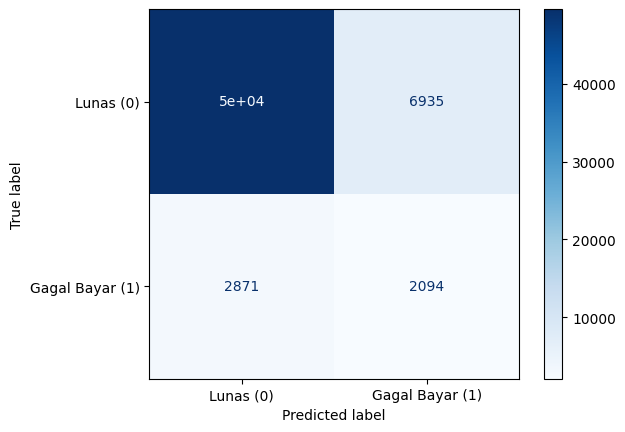

In [47]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_class_optimal = (y_pred_proba_best >= optimal_threshold).astype(int)

print(f"--- Hasil Model Terbaik (F1-Score Optimal) ---")

print("\nClassification Report (Optimal):")
print(classification_report(y_val, y_pred_class_optimal, target_names=['Lunas (0)', 'Gagal Bayar (1)']))

print("\nConfusion Matrix (Optimal):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_class_optimal,
                                        display_labels=['Lunas (0)', 'Gagal Bayar (1)'],
                                        cmap='Blues')
plt.show()